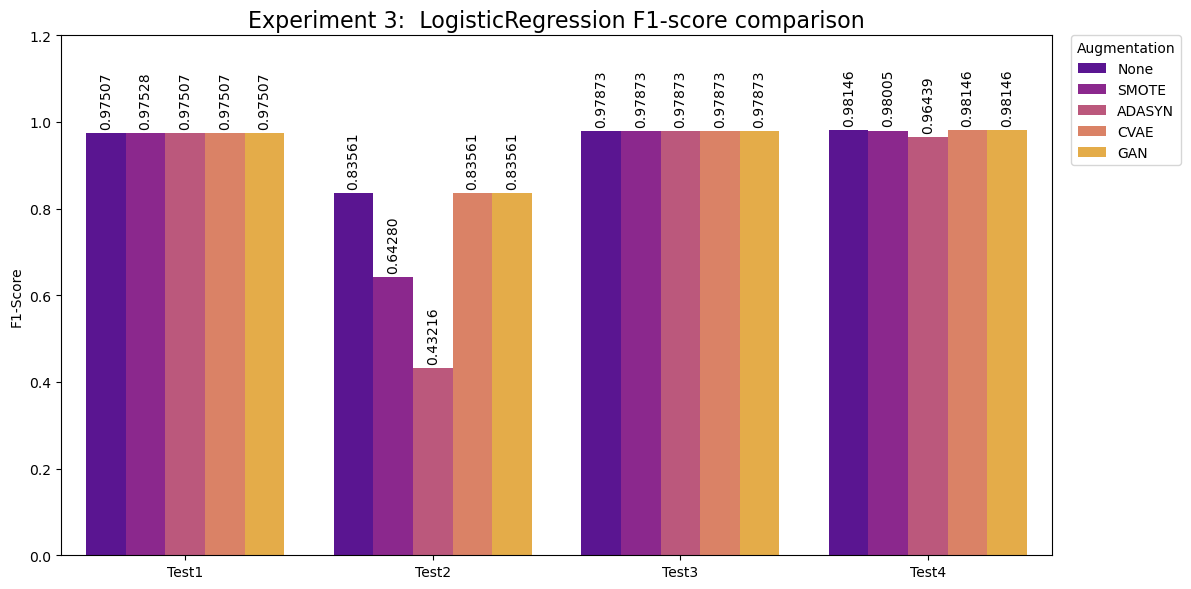

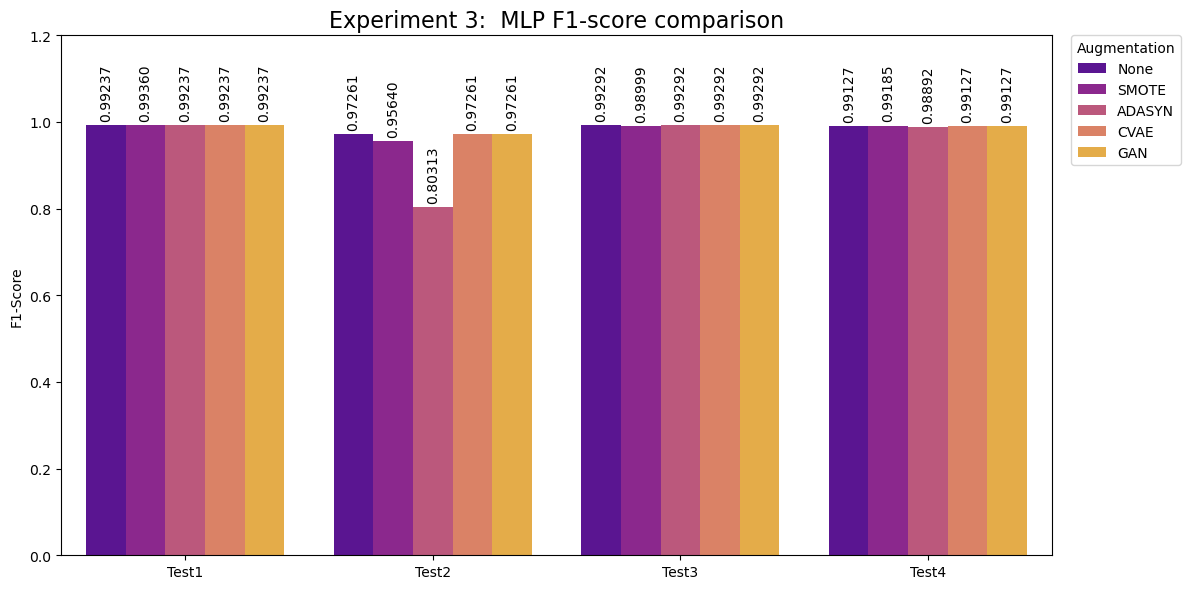

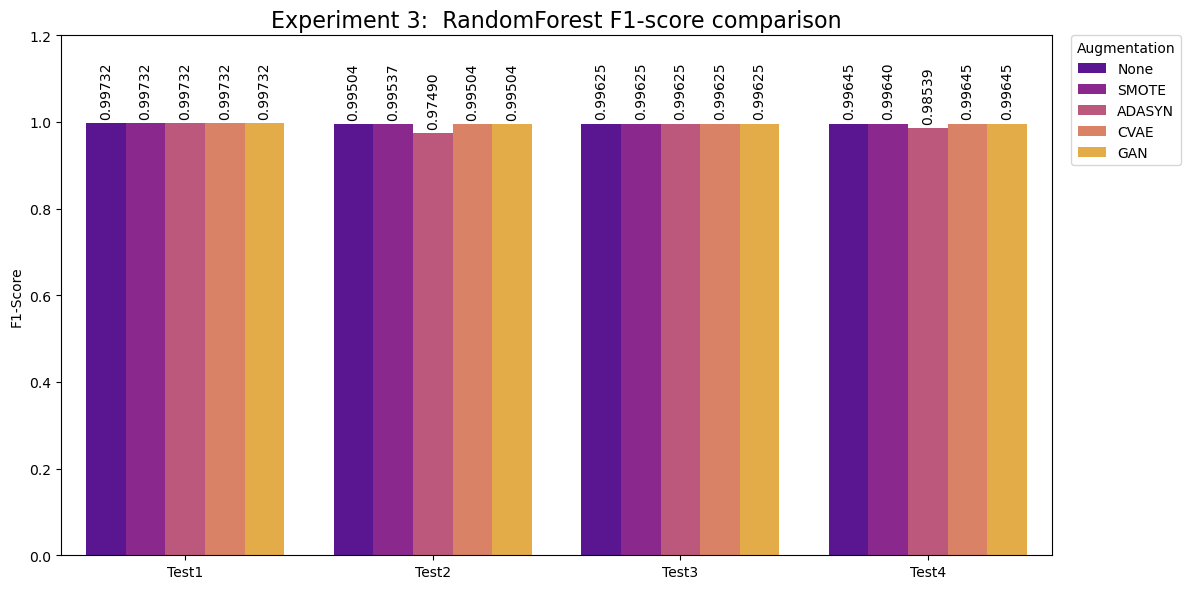

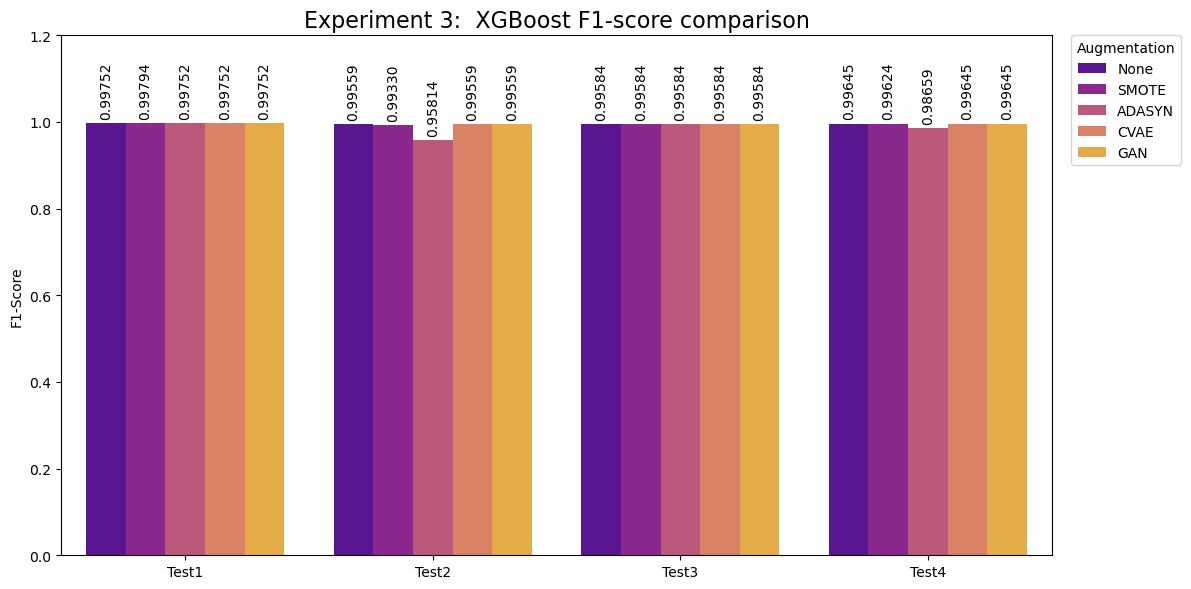

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset and ensure 'None' is treated as a string, not NaN
df = pd.read_csv('threeclass_combined_results.csv', keep_default_na=False)

# Preprocess
df = df[df["Model"].notna()]
df["Augmentation"] = pd.Categorical(
    df["Augmentation"], 
    categories=["None", "SMOTE", "ADASYN", "CVAE", "GAN"], 
    ordered=True
)
df["Test"] = pd.Categorical(
    df["Test"], 
    categories=["Test1", "Test2", "Test3", "Test4"], 
    ordered=True
)

# Define target models to plot
target_models = ["LogisticRegression", "MLP", "RandomForest", "XGBoost"]

# Plot in loop
for model in target_models:
    df_model = df[df["Model"] == model]

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df_model,
        x="Test",
        y="F1-Score",
        hue="Augmentation",
        palette="plasma"
    )

    ax.set_title(f"Experiment 3:  {model} F1-score comparison", fontsize=16)
    ax.set_ylabel("F1-Score")
    ax.set_xlabel("")
    ax.set_ylim(0, 1.2)

    for container in ax.containers:
        ax.bar_label(container, fmt='%.5f', rotation=90, padding=3)

    ax.legend(
        title="Augmentation",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        borderaxespad=0
    )
    plt.tight_layout()
    plt.show()